# Описание данных:

**user_data:**
- client – идентификатор пользователя
- premium – является ли клиент премиальным
- age – возраст
- logs:
  
**client – идентификатор пользователя**
- success – результат (успех – 1, нет – 0)
- platform – платформа
- time – время в формате Unix


# Задачи


1. Импорт данных;
2. Выявление клиента с наибольшим количеством успешных операций;
3. Поиск платформы, с которой совершено наибольшее количество удачных операций;
4. Нахождение платформы, которую предпочитают премиальные клиенты;
5. Визуализация распределения возраста клиентов в зависимости от типа клиента;
6. График распределения числа успешных операций;
7. Визуализация числа успешных операций, сделанных на платформе computer, в зависимости от возраста;
8. Определение возрастной группы клиентов с наибольшим числом успешных операций;
 

Импорт библиотеки pandas. Загрузка двух датасетов user_data и logs. Проверка размера таблицы, типов переменных, наличия пропущенных значений, описательной статистику.

In [1]:
import pandas as pd

In [2]:
user_data_df = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs_df = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

# Для user_data_df:


In [19]:
user_data_df.shape

(2954, 3)

In [20]:
user_data_df.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [21]:
user_data_df.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [22]:
user_data_df.isna().sum()

client     0
premium    0
age        0
dtype: int64

# Для logs_df:


In [23]:
logs_df.shape

(4500, 4)

In [24]:
logs_df.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [25]:
logs_df.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Сколько уникальных значений принимает переменная platform?

In [26]:
logs_df['platform'].nunique()

3

Какой клиент совершил больше всего успешных операций?

In [27]:
success_client = logs_df[logs_df['success']==True] \
    .groupby('client',as_index=False) \
    .agg({'success':'count'}) \
    .sort_values('success',ascending=False)
success_client = success_client[success_client['success']==41] \
    .sort_values('client',ascending=True)
success_client

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


С какой платформы осуществляется наибольшее количество успешных операций?



In [28]:
success_platform = logs_df[logs_df['success']==True] \
    .groupby('platform',as_index=False) \
    .agg({'success':'count'}) \
    .sort_values('success',ascending=False)
success_platform

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [29]:
new_df = logs_df.merge(user_data_df,on='client')
count_premium = new_df[new_df['premium']==True] \
    .groupby('platform',as_index=False) \
    .agg({'client':'count'})
count_premium

,platform,client
0,computer,150
1,phone,246
2,tablet,24


In [30]:
new_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

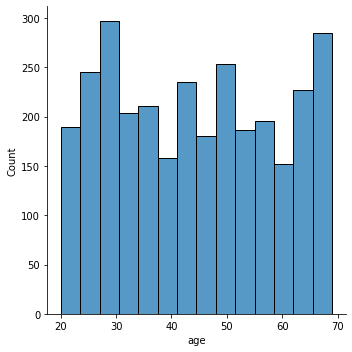

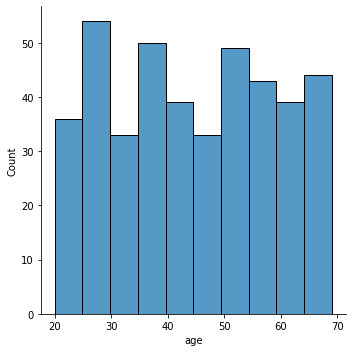

In [34]:
sns.displot(new_df.query('premium == False').age);
sns.displot(new_df.query('premium == True').age);

In [35]:
client_vs_successnmber = new_df.groupby(['client','age'],as_index=True) \
    .agg({'success':'sum'})
client_vs_successnmber

,,success
client,age,
40,52,1
75,38,1
81,68,1
132,56,1
164,37,1
...,...,...
99926,46,1
99927,51,1
99931,69,1


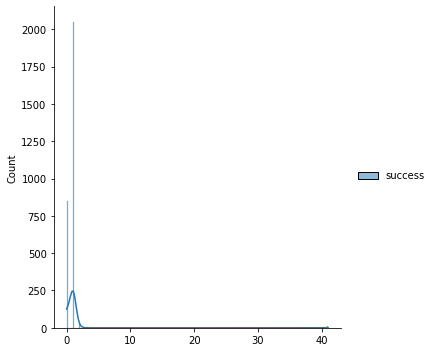

In [36]:
ex = sns.displot(client_vs_successnmber,kde=True)

# Визуализация числа успешных операций, сделанных на платформе computer, в зависимости от возраста

Вариант №1:

In [37]:
onlu_suc_com = new_df[new_df['platform']=='computer'] \
    .groupby('age',as_index=False) \
    .agg({'success':'sum'})
onlu_suc_com.head(4)

,age,success
0,20,11
1,21,15
2,22,8
3,23,15


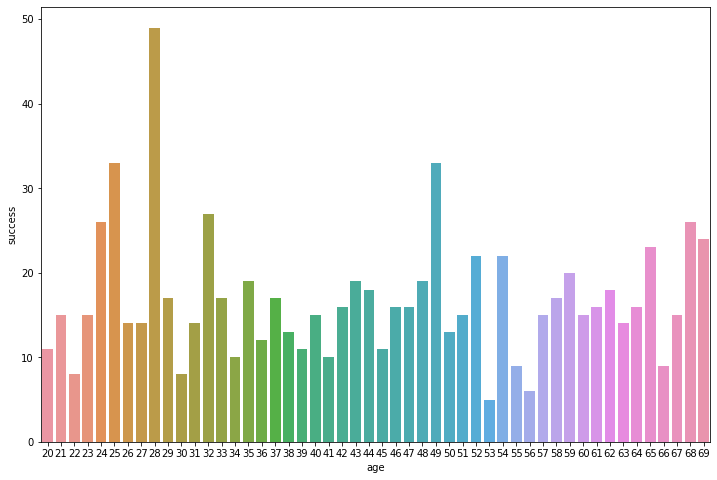

In [38]:
plt.figure(figsize=(12, 8))
ex = sns.barplot(x='age',y='success',data=onlu_suc_com)

Вариант №2:

In [39]:
data = new_df.query('platform=="computer" and success==True')

c:\users\сергей\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


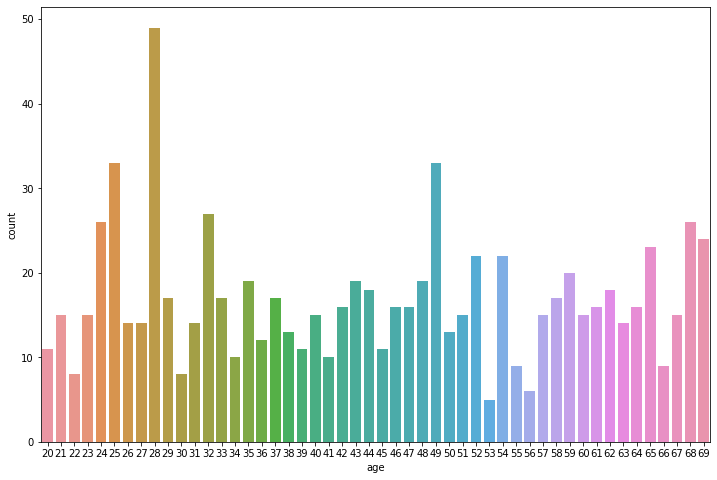

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(data.age);